In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

inpu=[np.random.random((10,2))+np.array([10,10]),np.random.random((10,2))+np.array([5,10]),np.random.random((10,2))+np.array([10,5])]

def ploting(X,y,hue):
    sns.scatterplot(x=X[:,0],y=X[:,1],hue=hue)
    sns.scatterplot(x=y[:,0],y=y[:,1])
    plt.show()
    
class CMeans():
    
    
 
     # defining variables and initialise them using constructor
     # n : number of clusters
     # dim : dimensions
     # c : center of clusters in which we start from random
    def __init__(self, n, dim): 
        self.n = n
        self.dim = dim
        self.c = np.random.random((n,dim))
  
    def distance(self, x, center):
        return np.sum((x-center)**2,axis=-1)**0.5
  
    def predict(self,x):
        all_distances = []
        for cluster in range(self.n):
            distances = self.distance(x,self.c[cluster]).reshape((1,-1))
            all_distances.append(distances)
        dis = np.concatenate(all_distances).T
        Y=np.argmin(dis,axis=1)
        return Y
      
      
    def fit(self,X,max_iter):
        self.c += np.mean(X,axis=0)

        prev_centers = None
        current_centers = self.c

        if self.dim==2:
            ploting(X,self.c,None)
        for i in range(max_iter):
            Y = self.predict(X)
            Y_one_hot = np.eye(self.n)[Y.reshape(-1)].T
            new_centers = np.zeros((self.n,self.dim))

            if self.dim==2:
                ploting(X,self.c,Y)


            for dim in range(self.dim):
                mu = np.sum(Y_one_hot.T,axis=0)+0.000001
                dim_values = X[:,dim].T * Y_one_hot
                new_centers[:,dim] = np.sum(dim_values.T,axis=0)/mu
            mask = new_centers==0
            new_centers[mask] = self.c[mask]
            self.c = new_centers
            prev_centers = current_centers
            current_centers = self.c


            if abs(np.sum(current_centers-prev_centers)) < 0.000001:
                break

            if self.dim==2:
                ploting(X,self.c,Y)


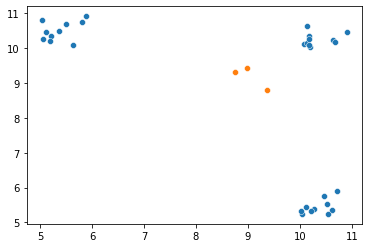

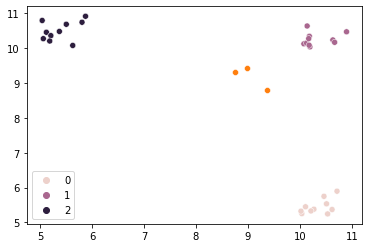

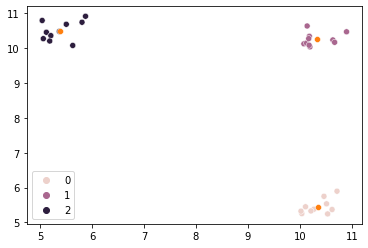

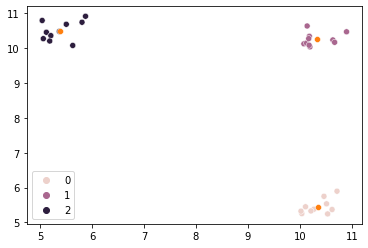

In [45]:
c = CMeans(3,2)

c.fit(X,10)
